Nama : Fadhil Dzikri Aqila

Kelas : TK-45-G09

NIM : 1103213136

# Filter Moving Average

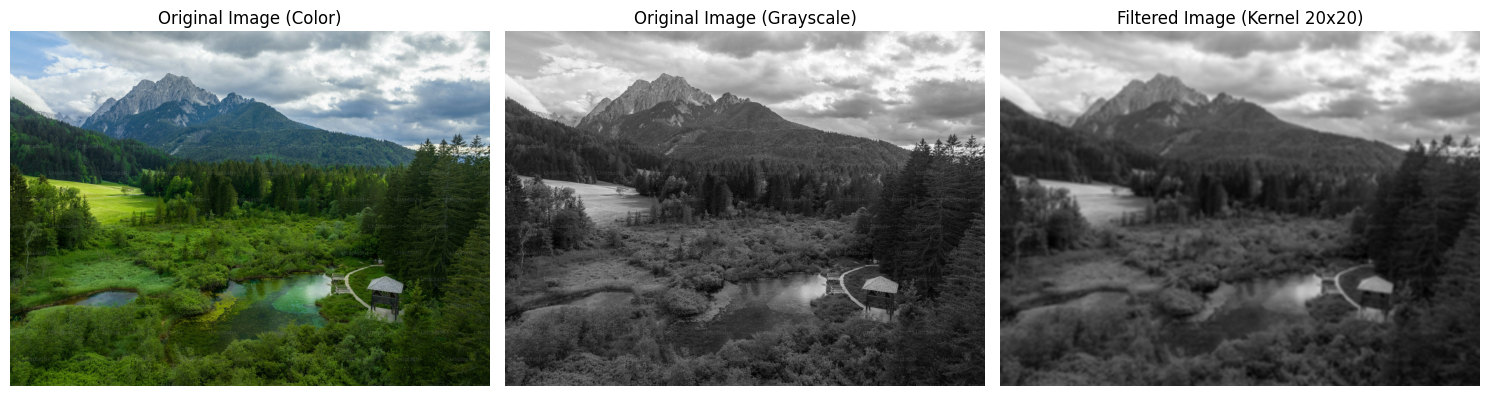

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Fungsi untuk membuat filter moving average
def apply_moving_average_filter(image, kernel_size):
    # Buat kernel moving average
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    # Terapkan filter menggunakan cv2.filter2D
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# Fungsi utama simulasi
def main():
    # Load gambar
    image = cv2.imread("img1.jpg")  # Memuat gambar dengan warna
    if image is None:
        print("Gambar tidak ditemukan. Pastikan file 'img1.jpg' ada.")
        return

    # Konversi ke grayscale untuk penerapan filter
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan moving average filter
    kernel_size = 20  # Ukuran kernel
    filtered_image = apply_moving_average_filter(grayscale_image, kernel_size)

    # Plot hasil
    plt.figure(figsize=(15, 5))
    # Gambar asli dalam warna
    plt.subplot(1, 3, 1)
    plt.title("Original Image (Color)")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk ditampilkan dengan matplotlib
    plt.axis("off")

    # Gambar grayscale
    plt.subplot(1, 3, 2)
    plt.title("Original Image (Grayscale)")
    plt.imshow(grayscale_image, cmap="gray")
    plt.axis("off")

    # Gambar setelah filter
    plt.subplot(1, 3, 3)
    plt.title(f"Filtered Image (Kernel {kernel_size}x{kernel_size})")
    plt.imshow(filtered_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Filter moving average efektif untuk mengurangi noise atau membuat gambar terlihat lebih halus. Namun, penggunaan kernel besar (20x20) menyebabkan kehilangan detail signifikan, sehingga gambar menjadi buram. Untuk aplikasi yang membutuhkan kejelasan detail, kernel yang lebih kecil mungkin lebih cocok.

# Deteksi Fitur dengan SIFT

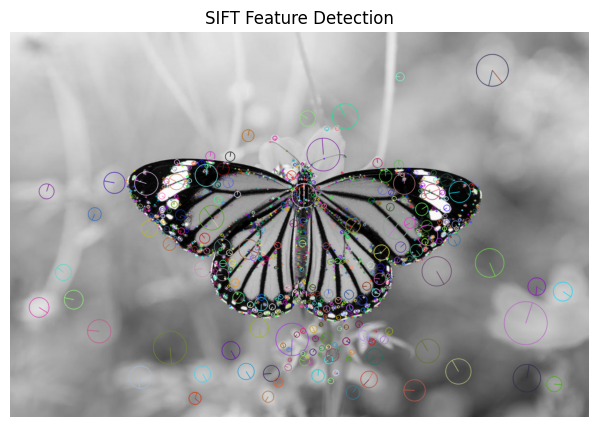

Jumlah fitur yang terdeteksi: 1520
Bentuk deskripsi fitur: (1520, 128)


In [ ]:
import cv2
from matplotlib import pyplot as plt

def sift_feature_detection(image_path):
    # Load gambar
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Buat objek SIFT
    sift = cv2.SIFT_create()

    # Deteksi keypoints dan deskripsi
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Gambar keypoints pada gambar asli
    image_with_keypoints = cv2.drawKeypoints(
        image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.title("SIFT Feature Detection")
    plt.imshow(image_with_keypoints, cmap="gray")
    plt.axis("off")
    plt.show()

    # Informasi tambahan
    print(f"Jumlah fitur yang terdeteksi: {len(keypoints)}")
    print(f"Bentuk deskripsi fitur: {descriptors.shape}")

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "img2.jpeg"
    sift_feature_detection(image_path)


SIFT berhasil mendeteksi fitur di area-area signifikan, khususnya pada pola simetris dan tekstur detail di sayap kupu-kupu. Teknik ini sangat bermanfaat untuk tugas computer vision yang membutuhkan deteksi fitur yang tahan terhadap perubahan skala, rotasi, dan pencahayaan. Jumlah keypoint yang terdeteksi serta deskripsi fitur menyediakan representasi unik dari gambar untuk analisis lebih lanjut.

# Representasi Histogram Gambar

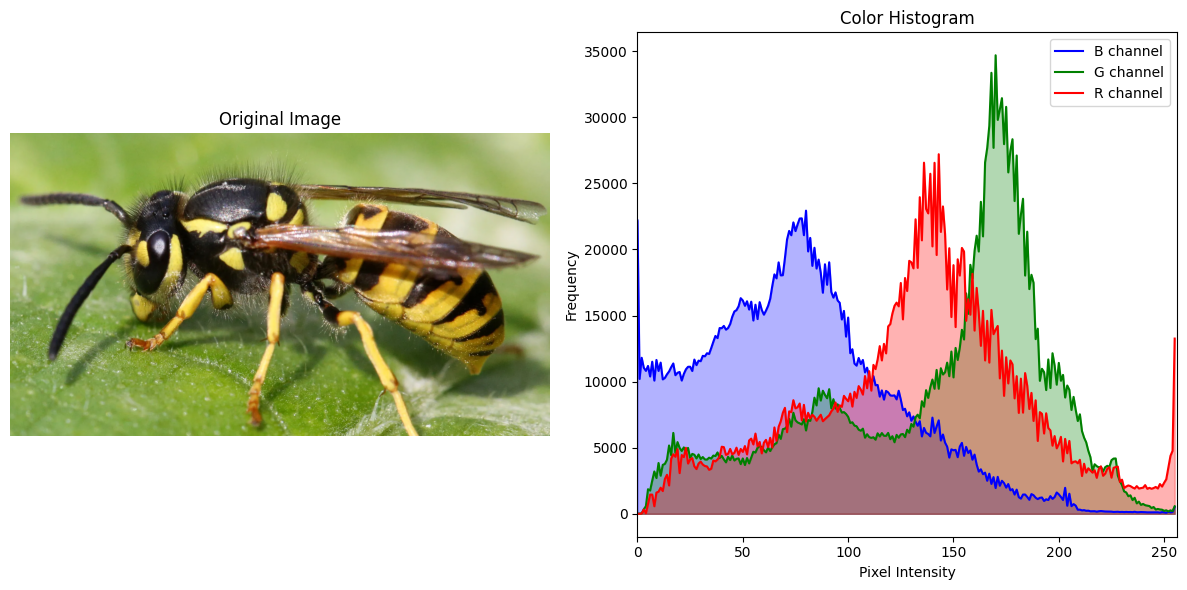

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def plot_color_histogram(image_path):
    # Load gambar dalam mode warna (BGR)
    image = cv2.imread(image_path)
    if image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Pisahkan channel warna (BGR)
    channels = cv2.split(image)
    colors = ('b', 'g', 'r')  # Warna untuk plot (blue, green, red)
    histogram = {}

    # Plot gambar asli
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Plot histogram untuk setiap channel
    plt.subplot(1, 2, 2)
    plt.title("Color Histogram")
    for (channel, color) in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color, label=f"{color.upper()} channel")
        plt.fill_between(range(256), hist.flatten(), color=color, alpha=0.3)

    plt.xlim([0, 256])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "img3.jpg"
    plot_color_histogram(image_path)

Histogram memberikan visualisasi distribusi warna gambar, yang dapat digunakan untuk memahami karakteristik warna dalam gambar tersebut. Misalnya, jika histogram menunjukkan puncak di bagian intensitas tinggi pada channel merah, berarti gambar memiliki warna kemerahan yang terang. Sebaliknya, distribusi yang condong ke intensitas rendah mengindikasikan warna gelap.

# Gaussian Smoothing

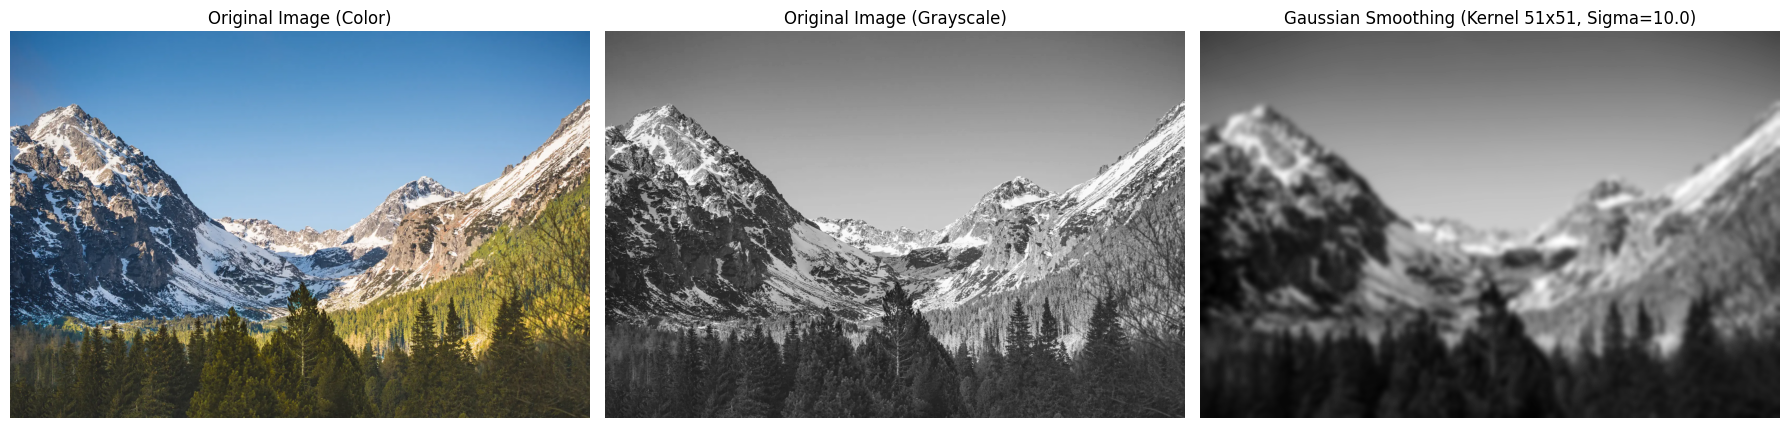

In [ ]:
import cv2
from matplotlib import pyplot as plt

def apply_gaussian_smoothing(image_path, kernel_size, sigma):
    # Load gambar asli (warna)
    color_image = cv2.imread(image_path)
    if color_image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Konversi gambar ke grayscale untuk smoothing
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Terapkan Gaussian Smoothing pada gambar grayscale
    smoothed_image = cv2.GaussianBlur(grayscale_image, (kernel_size, kernel_size), sigma)

    # Tampilkan gambar asli (warna), grayscale asli, dan hasil smoothing
    plt.figure(figsize=(18, 6))

    # Gambar asli (warna)
    plt.subplot(1, 3, 1)
    plt.title("Original Image (Color)")
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk matplotlib
    plt.axis("off")

    # Gambar asli (grayscale)
    plt.subplot(1, 3, 2)
    plt.title("Original Image (Grayscale)")
    plt.imshow(grayscale_image, cmap="gray")
    plt.axis("off")

    # Gambar setelah Gaussian Smoothing
    plt.subplot(1, 3, 3)
    plt.title(f"Gaussian Smoothing (Kernel {kernel_size}x{kernel_size}, Sigma={sigma})")
    plt.imshow(smoothed_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "img4.jpg"

    # Parameter smoothing
    kernel_size = 51  # Ukuran kernel (harus ganjil, misalnya 3, 5, 7)
    sigma = 10.0  # Standar deviasi Gaussian

    # Panggil fungsi
    apply_gaussian_smoothing(image_path, kernel_size, sigma)

Hasil gaussian smoothing menunjukkan gambar yang lebih halus dengan detail dan tepi yang berkurang. Namun, kernel besar dan sigma tinggi dapat menghilangkan terlalu banyak detail penting jika tujuan pengolahan citra membutuhkan presisi tinggi.

# Deteksi Tepi dengan Sobel Filter

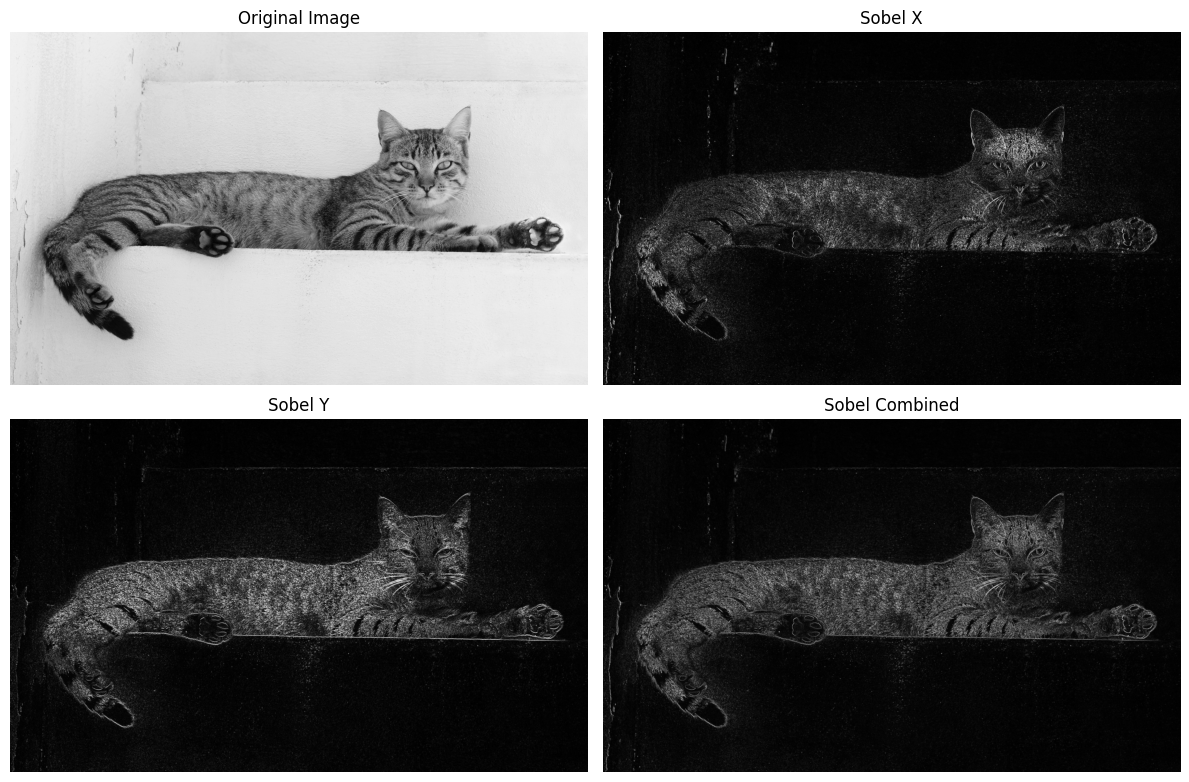

In [ ]:
import cv2
from matplotlib import pyplot as plt

def sobel_edge_detection(image_path):
    # Load gambar dalam grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Deteksi tepi dengan Sobel (gradien horizontal dan vertikal)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal

    # Mengambil nilai absolut dan mengubah tipe data menjadi uint8
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)

    # Kombinasikan gradien horizontal dan vertikal
    sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    # Tampilkan hasil
    plt.figure(figsize=(12, 8))

    # Gambar asli
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Sobel X
    plt.subplot(2, 2, 2)
    plt.title("Sobel X")
    plt.imshow(sobel_x, cmap="gray")
    plt.axis("off")

    # Sobel Y
    plt.subplot(2, 2, 3)
    plt.title("Sobel Y")
    plt.imshow(sobel_y, cmap="gray")
    plt.axis("off")

    # Sobel Combined
    plt.subplot(2, 2, 4)
    plt.title("Sobel Combined")
    plt.imshow(sobel_combined, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "img5.jpg"
    sobel_edge_detection(image_path)


Output Sobel X dan Y membantu memahami arah gradien secara terpisah, sedangkan hasil kombinasi memberikan visualisasi yang lebih lengkap tentang tepi dalam gambar. Namun, jika terdapat noise, metode ini mungkin mendeteksi tepi palsu, sehingga preprocessing (misalnya Gaussian smoothing) sering dilakukan sebelum Sobel.

# Representasi Fitur dengan HOG

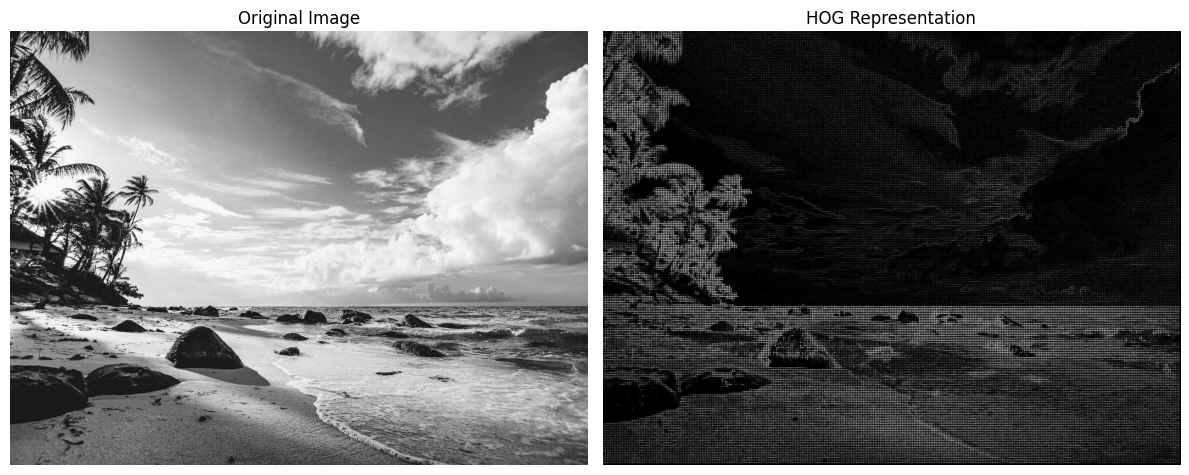

HOG Features Extracted: 3099816 features


In [ ]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

def extract_hog_features(image_path, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    # Load gambar
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Gambar tidak ditemukan. Pastikan path file gambar benar.")
        return

    # Ekstraksi fitur HOG
    features, hog_image = hog(
        image,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        visualize=True,
        block_norm="L2-Hys"
    )

    # Tingkatkan kontras untuk visualisasi HOG
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Tampilkan gambar asli dan representasi HOG
    plt.figure(figsize=(12, 6))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Visualisasi HOG
    plt.subplot(1, 2, 2)
    plt.title("HOG Representation")
    plt.imshow(hog_image_rescaled, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    return features

if __name__ == "__main__":
    # Path ke gambar input
    image_path = "img6.jpg"

    # Ekstraksi fitur HOG
    orientations = 9  # Jumlah orientasi
    pixels_per_cell = (8, 8)  # Ukuran piksel per sel
    cells_per_block = (2, 2)  # Ukuran sel per blok

    hog_features = extract_hog_features(image_path, orientations, pixels_per_cell, cells_per_block)

    print(f"HOG Features Extracted: {len(hog_features)} features")

Output representasi HOG memberikan visualisasi pola dominan dalam gambar, terutama pada area dengan kontras tinggi. HOG sangat efektif untuk memahami fitur struktural gambar yang berkaitan dengan bentuk dan orientasi, membuatnya cocok untuk analisis objek atau pola dalam berbagai aplikasi.